<a href="https://colab.research.google.com/github/prideven/Frequent_Pattern_Mining/blob/main/FPM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Frequent patterns are itemsets, subsequences, or substructures that appear in a data set with frequency no less than a user-specified threshold. For example, a set of items, such as milk and bread, that appear frequently together in a transaction data set, is a frequent items.

# Apriori


It is an algorithm for frequent item set mining and association rule generation for a relational databse system. It starts with identifying frequent individual items in the database and extending them to larger candidate item sets till the time those item sets appear sufficiently often in the database. The frequent item sets minned by Apriori can be used to generate association rules with highlight general trends in the database.

**Dataset**: Kaggle grocerry dataset

Groceries data analysis, aims to discover how items purchased by customers are associated with each other.


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
!pip install mlxtend
%pip install mlxtend --upgrade

     |████████████████████████████████| 1.3 MB 6.5 MB/s 
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import networkx as nx
import gdown
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori,association_rules
import matplotlib.pyplot as plt
plt.style.use('default')

In [10]:
!pip install apyori
import apyori
from apyori import apriori
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns.fpgrowth import fpgrowth


Import the data in df

In [43]:
url='https://drive.google.com/uc?id=13o5DBSVoTO_DQwOmZ2ItIUit6BKiEv9z'
output= "data.csv"
gdown.download(url,output,quiet=False)
df = pd.read_csv('data.csv')
df

Downloading...
From: https://drive.google.com/uc?id=13o5DBSVoTO_DQwOmZ2ItIUit6BKiEv9z
To: /content/data.csv
100%|██████████| 1.10M/1.10M [00:00<00:00, 6.42MB/s]


,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
...,...,...,...
38760,4471,08-10-2014,sliced cheese
38761,2022,23-02-2014,candy
38762,1097,16-04-2014,cake bar
38763,1510,03-12-2014,fruit/vegetable juice


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [5]:
df = df.fillna('')

* Transform data set to meet the apriori function requirements
* Group data by MemberID as instruction
* Transfer Intem Description into a list for each transaction





In [6]:

df_grouped = df.groupby(by = ['Member_number'])['itemDescription'].apply(list).reset_index(name='itemDescription')

**Top 20 frequently buying items by customer**

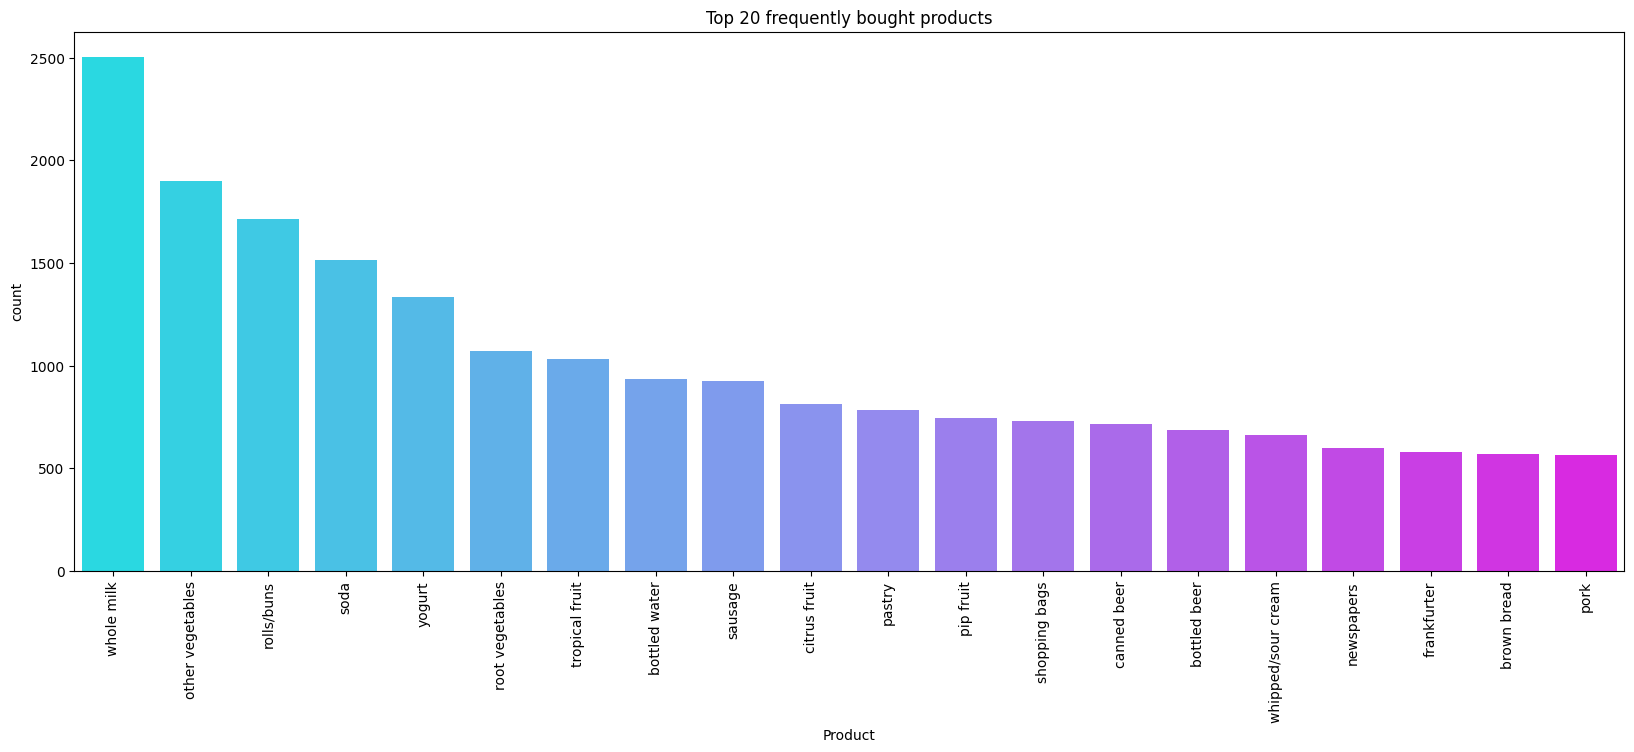

In [7]:

plt.rcParams['figure.figsize']=20,7
sns.countplot(data=df, x=df['itemDescription'],
             order = df['itemDescription'].value_counts().head(20).index,
             palette='cool')
plt.xticks(rotation=90)
plt.xlabel('Product')
plt.title('Top 20 frequently bought products')
plt.show()



In [12]:
df_grouped = df_grouped['itemDescription'].apply(pd.Series)

In [13]:
data = df_grouped.astype(str).values.tolist()

In [14]:
data = [[ele for ele in sub if ele != 'nan'] for sub in data]

In [15]:
association_rules = apriori(transactions = data, min_support=0.005) 
association_results = list(association_rules)
apriori_result = pd.DataFrame(association_results)

In [16]:
apriori_result.head()

,items,support,ordered_statistics
0,(Instant food products),0.015393,"[((), (Instant food products), 0.0153925089789..."
1,(UHT-milk),0.078502,"[((), (UHT-milk), 0.07850179579271421, 1.0)]"
2,(abrasive cleaner),0.005644,"[((), (abrasive cleaner), 0.005643919958953309..."
3,(artif. sweetener),0.007440,"[((), (artif. sweetener), 0.007439712673165726..."
4,(baking powder),0.031042,"[((), (baking powder), 0.0310415597742432, 1.0)]"


In [17]:
apriori_result['ordered_statistics'][0]

[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Instant food products'}), confidence=0.01539250897896357, lift=1.0)]

In [44]:
# copy data to transacetion to avoid 'generator' object is not callable error created by name
transactions = data.copy()

# instantiate a transaction encoder
te = TransactionEncoder()

# fit the transaction encoder using the data
te.fit(transactions)

# transform the data into an array of encoded transactions
trans_encoded = te.transform(transactions)

# convert the array of encoded transactions into a dataframe
df_encoded = pd.DataFrame(trans_encoded, columns=te.columns_)
df_encoded

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,beverages,bottled beer,bottled water,brandy,brown bread,butter,butter milk,cake bar,candles,candy,canned beer,canned fish,canned fruit,canned vegetables,cat food,cereals,chewing gum,chicken,chocolate,chocolate marshmallow,citrus fruit,cleaner,cling film/bags,cocoa drinks,coffee,condensed milk,cooking chocolate,cookware,cream,cream cheese,...,salt,salty snack,sauces,sausage,seasonal products,semi-finished bread,shopping bags,skin care,sliced cheese,snack products,soap,soda,soft cheese,softener,soups,sparkling wine,specialty bar,specialty cheese,specialty chocolate,specialty fat,specialty vegetables,spices,spread cheese,sugar,sweet spreads,syrup,tea,tidbits,toilet cleaner,tropical fruit,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,True,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3893,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False

**our min support is 7, but it has to be expressed as a percentage for mlxtend**

Applying Apriori

Will be using mlxtend library since it provides fast and efficient implementation of apriori. apriori(df, min_support=0.5, use_colnames=False, max_len=None) Here

df = dataset
min_support= minimum support
use_colnames = It unables us to preserve the column names for itemsets which makes it more readable.
max_len = defines maximum length of itemset generated.

In [19]:
min_support = 7/len(transactions) 

In [20]:
# compute the frequent itemsets using fpgriowth from mlxtend
frequent_itemsets = fpgrowth(df_encoded, min_support=min_support, use_colnames = True)

# print the frequent itemsets
frequent_itemsets

,support,itemsets
0,0.458184,(whole milk)
1,0.313494,(soda)
2,0.282966,(yogurt)
3,0.206003,(sausage)
4,0.177527,(pastry)
...,...,...
67967,0.001796,"(rolls/buns, nuts/prunes, whole milk)"
67968,0.002565,"(soap, whole milk)"
67969,0.002565,"(soap, soda)"
67970,0.001796,"(tropical fruit, soap)"


**Mining Association rules**

In [21]:
# Compute the association rules based on the frequent itemsets
from mlxtend.frequent_patterns import association_rules

# compute and print the association rules
association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(rolls/buns, soda)",(whole milk),0.119805,0.458184,0.065162,0.543897,1.187072,0.010269,1.187926
1,"(other vegetables, rolls/buns, soda)",(whole milk),0.052591,0.458184,0.031811,0.604878,1.320165,0.007715,1.371264
2,"(other vegetables, soda)",(whole milk),0.124166,0.458184,0.069266,0.557851,1.217528,0.012375,1.225416
3,(yogurt),(whole milk),0.282966,0.458184,0.150590,0.532185,1.161510,0.020940,1.158185
4,"(yogurt, soda)",(whole milk),0.097486,0.458184,0.054387,0.557895,1.217622,0.009720,1.225537
...,...,...,...,...,...,...,...,...,...
62439,"(yogurt, nuts/prunes)",(whole milk),0.002565,0.458184,0.001796,0.700000,1.527772,0.000620,1.806054
62440,"(rolls/buns, nuts/prunes)",(whole milk),0.003079,0.458184,0.001796,0.583333,1.273143,0.000385,1.300359
62441,(soap),(whole milk),0.005131,0.458184,0.002565,0.500000,1.091265,0.000215,1.083633
62442,(soap),(soda),0.005131,0.313494,0.002565,0.500000,1.594926,0.000957,1.373012


# FP-Growth

This algorithm is an improvised version of Apriori Algorithm which is widely used for frequent pattern mining. What makes it different from Apriori algorithm is, here no candidates generation is required. It uses so called F-trees data structure without generating the candidate sets exclusively. This overcomes the drawback of using Apriori, since because of non-generation of candidate sets, it becomes very efficient in case of large datasets. As Apriori used multiple scan in the database to check the support of each itemset generated, hence increasing the cost and increasing runtime. This drawback is also overcome by FP-Growth Algorithm.

I have used the same dataset as used in case of Apriori Algorithm. Taking min_sup = 0.2

In [45]:
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
t_df = pd.DataFrame(te_ary, columns=te.columns_)
t_df

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,beverages,bottled beer,bottled water,brandy,brown bread,butter,butter milk,cake bar,candles,candy,canned beer,canned fish,canned fruit,canned vegetables,cat food,cereals,chewing gum,chicken,chocolate,chocolate marshmallow,citrus fruit,cleaner,cling film/bags,cocoa drinks,coffee,condensed milk,cooking chocolate,cookware,cream,cream cheese,...,salt,salty snack,sauces,sausage,seasonal products,semi-finished bread,shopping bags,skin care,sliced cheese,snack products,soap,soda,soft cheese,softener,soups,sparkling wine,specialty bar,specialty cheese,specialty chocolate,specialty fat,specialty vegetables,spices,spread cheese,sugar,sweet spreads,syrup,tea,tidbits,toilet cleaner,tropical fruit,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,True,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3893,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False

**Computing frequent itemsets using fpgrowth from mlxtend library**

In [46]:
from mlxtend.frequent_patterns.fpgrowth import fpgrowth
fpgrowth_frequent_itemsets = fpgrowth(df_encoded, min_support=0.2, use_colnames = True)

# Printing frequent itemsets
fpgrowth_frequent_itemsets

,support,itemsets
0,0.458184,(whole milk)
1,0.313494,(soda)
2,0.282966,(yogurt)
3,0.206003,(sausage)
4,0.349666,(rolls/buns)
5,0.376603,(other vegetables)
6,0.233710,(tropical fruit)
7,0.230631,(root vegetables)
8,0.213699,(bottled water)


Conclusion

**FP Growth	Vs  Apriori**


* FP growth generates pattern by constructing a FP tree	Apriori generates pattern by pairing the items into singletons, pairs and triplets.


* There is no candidate generation	Apriori uses candidate generation

* The process is faster as compared to Apriori. The runtime of process increases linearly with increase in number of itemsets.	The process is comparatively slower than FP Growth, the runtime increases exponentially with increase in number of itemsets